In [3]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [8]:
data.data.shape

(442, 10)

In [9]:
data.target.shape

(442,)

In [19]:
from sklearn.linear_model import LinearRegression
rgr = LinearRegression()
rgr.fit(data.data, data.target).score(data.data, data.target)

0.5177494254132934

In [21]:
from sklearn.svm import SVR
rgr = SVR()
rgr.fit(data.data, data.target).score(data.data, data.target)

-0.01594973798172017

MSEだけで評価するとSVRはLinearより悪く見えてしまう。

regressor.score()の出力と比較可能なKerasのメトリックを作る。

In [60]:
from keras import backend as K
 
def rmse(y_true, y_pred):
    return K.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
def R2(y_true, y_pred):
    u=K.sum(K.square(y_pred - y_true), axis=-1)
    v=K.sum(K.square(y_true - K.mean(y_true, axis=-1)), axis=-1)
    return 1-u/v

In [54]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
def _model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[R2])
    return model

In [55]:
model=_model()
h=model.fit(data.data, data.target, batch_size=None, epochs=256, verbose=1)

Epoch 1/256
442/442 [==============================] - 0s 1ms/step - loss: 29067.7808 - R2: 0.9128
Epoch 2/256
442/442 [==============================] - 0s 64us/step - loss: 29049.6621 - R2: 0.9135
Epoch 3/256
442/442 [==============================] - 0s 52us/step - loss: 29028.4764 - R2: 0.9153
Epoch 4/256
442/442 [==============================] - 0s 59us/step - loss: 29001.5573 - R2: 0.9146
Epoch 5/256
442/442 [==============================] - 0s 68us/step - loss: 28966.4684 - R2: 0.9126
Epoch 6/256
442/442 [==============================] - 0s 73us/step - loss: 28921.6080 - R2: 0.9132
Epoch 7/256
442/442 [==============================] - 0s 57us/step - loss: 28862.4093 - R2: 0.9120
Epoch 8/256
442/442 [==============================] - 0s 61us/step - loss: 28787.8137 - R2: 0.9166
Epoch 9/256
442/442 [==============================] - 0s 66us/step - loss: 28690.9417 - R2: 0.9127
Epoch 10/256
442/442 [==============================] - 0s 61us/step - loss: 28568.2421 - R2: 0.9139


442/442 [==============================] - 0s 61us/step - loss: 3488.0915 - R2: 0.9909
Epoch 83/256
442/442 [==============================] - 0s 57us/step - loss: 3478.0315 - R2: 0.9910
Epoch 84/256
442/442 [==============================] - 0s 61us/step - loss: 3467.9414 - R2: 0.9911
Epoch 85/256
442/442 [==============================] - 0s 57us/step - loss: 3458.0732 - R2: 0.9909
Epoch 86/256
442/442 [==============================] - 0s 59us/step - loss: 3448.9961 - R2: 0.9909
Epoch 87/256
442/442 [==============================] - 0s 57us/step - loss: 3440.1347 - R2: 0.9907
Epoch 88/256
442/442 [==============================] - 0s 59us/step - loss: 3430.8441 - R2: 0.9909
Epoch 89/256
442/442 [==============================] - 0s 61us/step - loss: 3420.9743 - R2: 0.9909
Epoch 90/256
442/442 [==============================] - 0s 68us/step - loss: 3411.9133 - R2: 0.9912
Epoch 91/256
442/442 [==============================] - 0s 57us/step - loss: 3403.0906 - R2: 0.9910
Epoch 92/256


442/442 [==============================] - 0s 64us/step - loss: 3027.2664 - R2: 0.9914
Epoch 164/256
442/442 [==============================] - 0s 54us/step - loss: 3026.1365 - R2: 0.9908
Epoch 165/256
442/442 [==============================] - 0s 61us/step - loss: 3021.0044 - R2: 0.9913
Epoch 166/256
442/442 [==============================] - 0s 54us/step - loss: 3019.1145 - R2: 0.9916
Epoch 167/256
442/442 [==============================] - 0s 52us/step - loss: 3017.6977 - R2: 0.9914
Epoch 168/256
442/442 [==============================] - ETA: 0s - loss: 2251.8560 - R2: 0.992 - 0s 57us/step - loss: 3013.5297 - R2: 0.9914
Epoch 169/256
442/442 [==============================] - 0s 59us/step - loss: 3010.3820 - R2: 0.9915
Epoch 170/256
442/442 [==============================] - 0s 59us/step - loss: 3009.8046 - R2: 0.9913
Epoch 171/256
442/442 [==============================] - 0s 57us/step - loss: 3006.2924 - R2: 0.9915
Epoch 172/256
442/442 [==============================] - 0s 57us/

442/442 [==============================] - 0s 52us/step - loss: 2907.4699 - R2: 0.9916
Epoch 244/256
442/442 [==============================] - 0s 64us/step - loss: 2906.9887 - R2: 0.9912
Epoch 245/256
442/442 [==============================] - 0s 59us/step - loss: 2908.6152 - R2: 0.9909
Epoch 246/256
442/442 [==============================] - 0s 64us/step - loss: 2906.0304 - R2: 0.9917
Epoch 247/256
442/442 [==============================] - 0s 54us/step - loss: 2905.3136 - R2: 0.9916
Epoch 248/256
442/442 [==============================] - 0s 57us/step - loss: 2905.1673 - R2: 0.9909
Epoch 249/256
442/442 [==============================] - 0s 54us/step - loss: 2904.1142 - R2: 0.9916
Epoch 250/256
442/442 [==============================] - 0s 57us/step - loss: 2903.1893 - R2: 0.9918
Epoch 251/256
442/442 [==============================] - 0s 57us/step - loss: 2903.0846 - R2: 0.9916
Epoch 252/256
442/442 [==============================] - 0s 64us/step - loss: 2902.1299 - R2: 0.9917
Epoc

In [56]:
model.evaluate(data.data, data.target, batch_size=16)

442/442 [==============================] - 0s 307us/step


[2899.3968693659854, 0.9809598790574398]

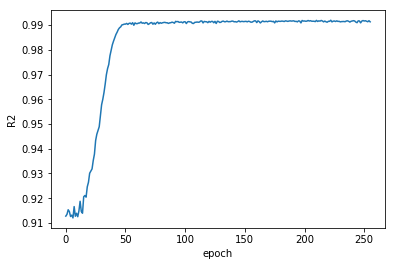

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(h.history['R2'])
plt.xlabel('epoch'); plt.ylabel('R2')